## Kernel Goals

There are three primary goals of this kernel. 
* Do a **statistical analysis** of the Loan Prediction dataset
* Do an **exploratory data analysis(EDA)** of the Loan Prediction dataset
* **Predict:** Why some people own a bank and other do not? and which factor influences more towards Loan Prediction? 

#  Importing libraries and exploring Data

##  Importing Libraries
Python is a fantastic language with a vibrant community that produces many amazing libraries. I am not a big fan of importing everything at once for the newcomers. So, I am going to introduce a few necessary libraries for now, and as we go on, we will keep unboxing new libraries when it seems appropriate

In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time



#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


# Any results you write to the current directory are saved as output.


Python version: 3.7.5 (tags/v3.7.5:5c02a39a0b, Oct 15 2019, 00:11:34) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.2
matplotlib version: 3.2.1
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.13.0
scikit-learn version: 0.22.2.post1
-------------------------


## Importing Visualization and ML Libraries
It is important for an analysis to have data visualization and develop machine learning models to get accurate prediction. Here we are going use sklearn and matplotlib for machine learning and plotting respectively 

In [90]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import autocorrelation_plot

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## Extracting Data

In [91]:
train_data = pd.read_csv( "Train_v2.csv",)
test_data = pd.read_csv("Test_v2.csv")


## Examining Dataset

In [92]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


From the head of data we can clearly identify **Bank account factor as the target/outcome variable** and rest of the factors are **predictor variables**

In [93]:
#Lets look at no.of columns and information about its factors
print ("The shape of the  data is (row, column):"+ str(train_data.shape))
print (train_data.info())

The shape of the  data is (row, column):(23524, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


Woof! We have nearly ***23524 records *** and ***13 factors*** . We need to do a build a lot of models to get an accurate prediction

In [94]:
#Looking at the datatypes of each factor
train_data.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

After loading the dataset we can see a number of things. These 13 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We have **3 numerical data** and **10 categorical data **

## Checking for missing data
Datasets in the real world are often messy, However, this dataset is almost clean. Lets analyze and see what we have here.

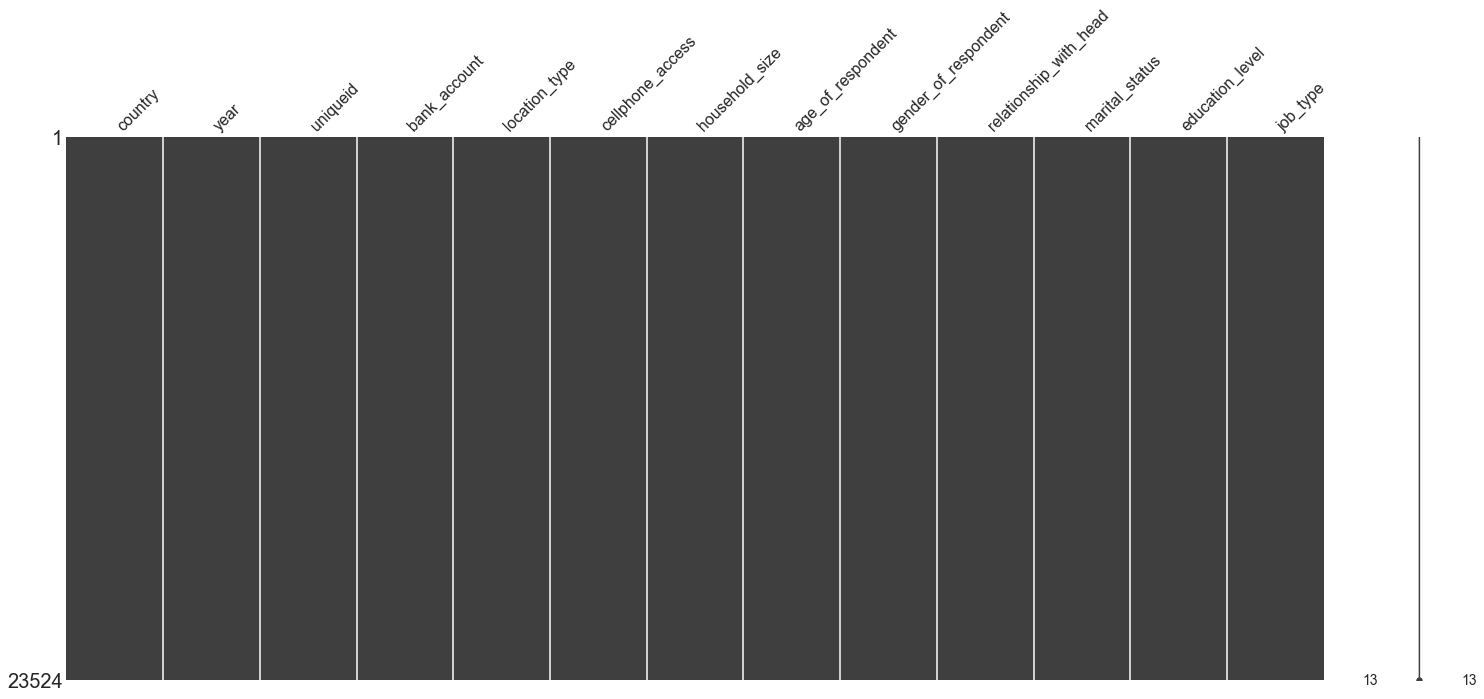

In [95]:
import missingno as msno 
msno.matrix(train_data);

Woah. This data set seems to have no missing values,Phew. Now we don't need to clean or fill any NaN values, But lets confirm it numerically as well

In [96]:
print('Data columns with null values:',train_data.isnull().sum(), sep = '\n')

Data columns with null values:
country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


As you see we have **0 null records**, lets get this party started !! 

Before jumping into the visualizations, Let's look at the **unique values** of few factors

In [97]:
print("Gender Of Respondent:",train_data.gender_of_respondent.value_counts(),sep = '\n')
print("-"*40)
print("Location type:",train_data.location_type.value_counts(),sep = '\n')
print("-"*40)
print("Education Level:",train_data.education_level.value_counts(),sep = '\n')
print("-"*40)
print("Maritial Status:",train_data.marital_status.value_counts(),sep = '\n')
print("-"*40)
print("Job Type:",train_data.job_type.value_counts(),sep = '\n')
print("-"*40)

Gender Of Respondent:
Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64
----------------------------------------
Location type:
Rural    14343
Urban     9181
Name: location_type, dtype: int64
----------------------------------------
Education Level:
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64
----------------------------------------
Maritial Status:
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64
----------------------------------------
Job Type:
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent     

Fine, We got a little idea about what is in dataset, Lets start visualizing the data

# Data Visualization
Before we dive into finding relations between independent variables and our dependent variable(Bank account), let us create some assumptions about how the relations may turn-out among features.

**Assumptions:**

* **Location:** More People in the urban areas rather than in the rural area which is highly populated but less people have a                   bank account
* **Age:** Younger respondents have bank account than the elderly ones
* **Education:** People in the tetiary institutions are likely to have a bank account than other level of education
* **Maritial Status:** Bachelors and splinters are more likely to have a bank account than married and divorced individuals

Now, let's see how the features are related to each other by creating some visualizations.

## Count of categorical Variable-Bar Chart
Let's look at the count in each category to assess the records

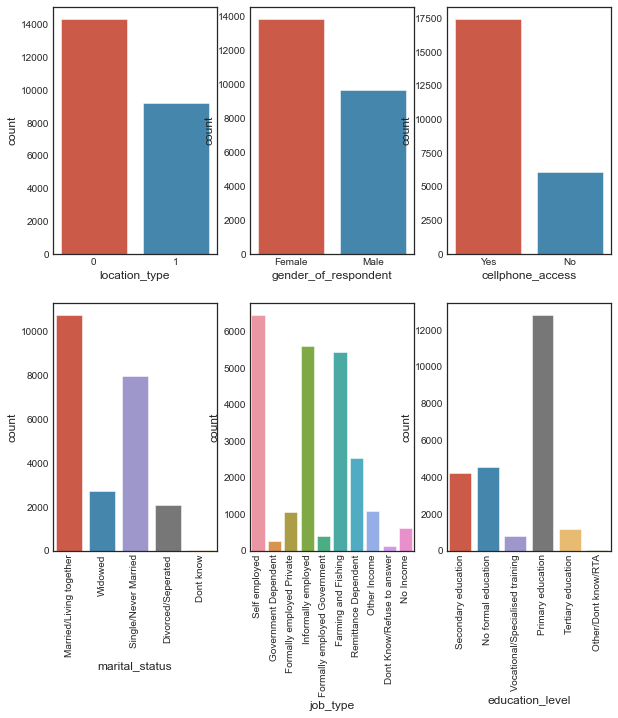

In [99]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
label = LabelEncoder()
train_data['location_type'] = label.fit_transform(train_data['location_type'])
sns.countplot(train_data['location_type'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.countplot(train_data['gender_of_respondent'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.countplot(train_data.cellphone_access)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
ax = sns.countplot(train_data.marital_status)
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
ax=sns.countplot(train_data.job_type)
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
ax = sns.countplot(train_data['education_level'])
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,10)


**Inferences:**
* More Respondents live in the Rural area more than the urban region
* There are more female respondents than male respondents
* Respondents have more cellphone acess

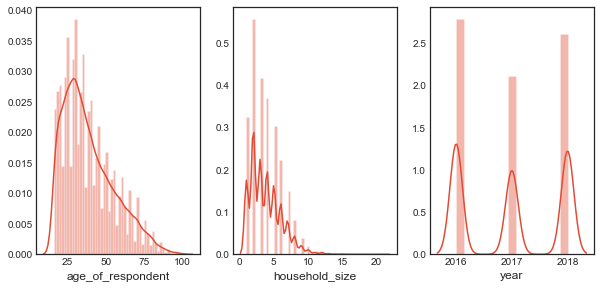

In [100]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(train_data['age_of_respondent'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(train_data['household_size'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(train_data['year'])
fig = plt.gcf()
fig.set_size_inches(10,10)

**Inference:**
* year has multi distribution
* Most of the features except year are right skewed

Should we standardize this data ? Let's see that before the analysis

## Age Distribution-Histogram

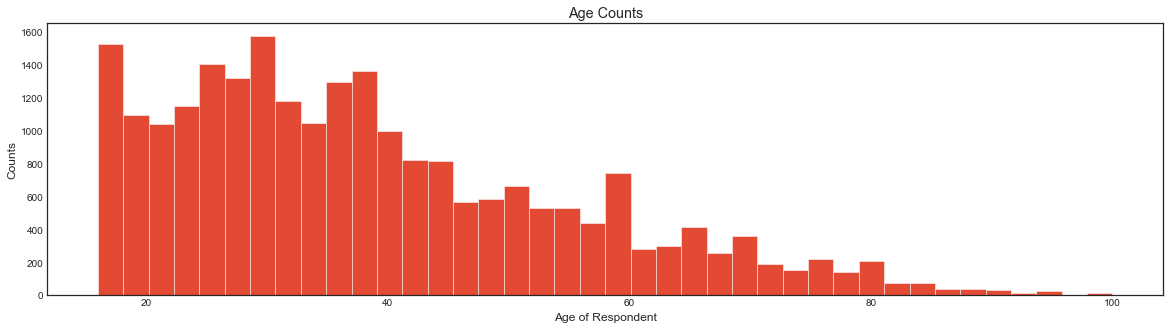

In [101]:
plt.figure(figsize=(20,5))
plt.hist(train_data.age_of_respondent,bins=40)
plt.xlabel("Age of Respondent")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

From the age distribution histogram, we can conclude that people aged between **15-38 have a bank account**

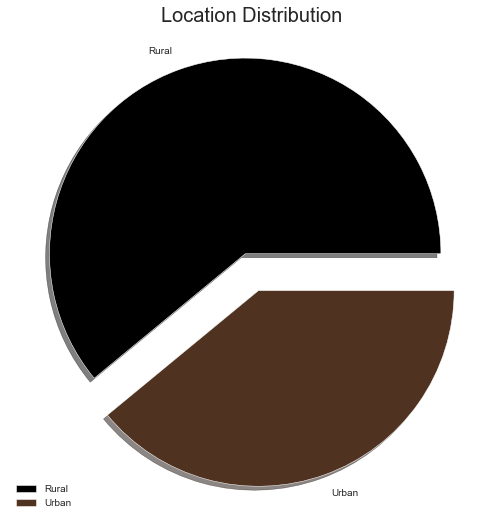

In [102]:
# Code forked from- https://www.kaggle.com/roshansharma/fifa-data-visualization
labels = ['Rural', 'Urban']
sizes = train_data['location_type'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Location Distribution', fontsize = 20)
plt.legend()
plt.show()

The given dataset has majority of the respondent are from the rural areas than the urban areas

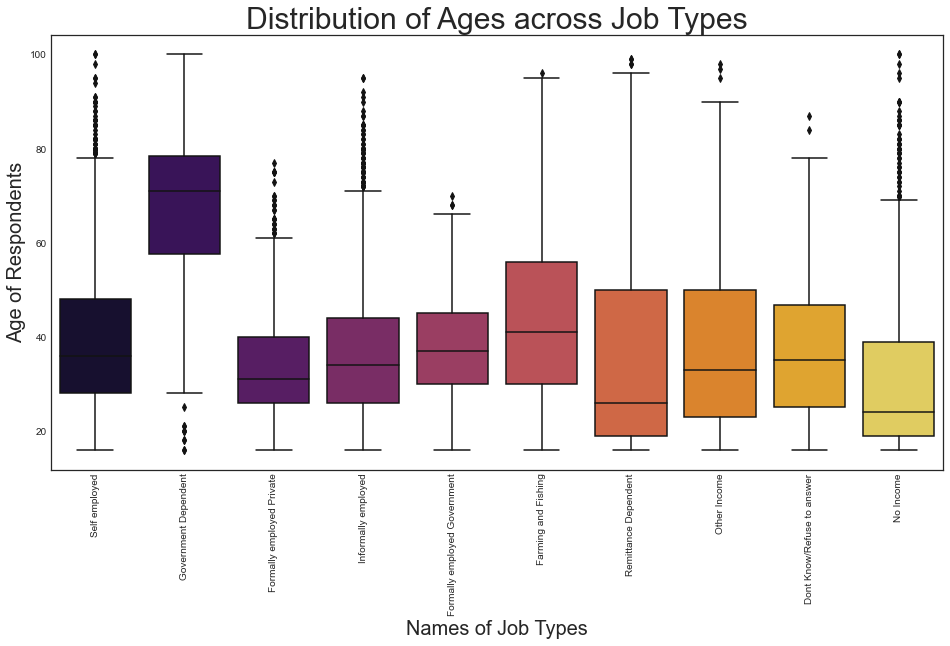

In [103]:
plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = train_data['job_type'], y =train_data['age_of_respondent'], data = train_data, palette = 'inferno')
ax.set_xlabel(xlabel = 'Names of Job Types', fontsize = 20)
ax.set_ylabel(ylabel = 'Age of Respondents', fontsize = 20)
ax.set_title(label = 'Distribution of Ages across Job Types', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

**Inference**
* Highest average Age(74years) belongs to those working at Government Dependent Jobs
* The lowest average Age(20 - 30 years) belongs to those with no Income and those working at Remittance Dependent
* Self employed, Formally employed Private, Informally employed, Formally employed Government, Farming and Fishing, oteher Income and Dont Know/Refuse to answer constitute the respondent between the age range of 30-40 years

## Relationship with working years and income- Joint & lm Plot

<Figure size 720x360 with 0 Axes>

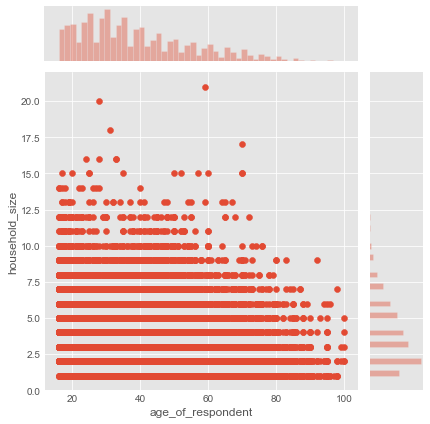

In [104]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.jointplot(x='age_of_respondent', y='household_size', data=train_data)

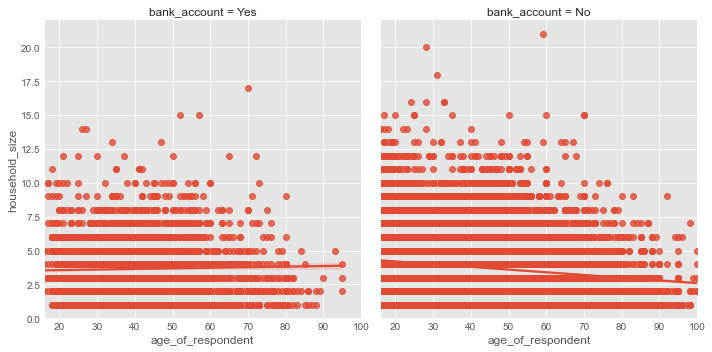

In [105]:
sns.lmplot(x = 'age_of_respondent', y = 'household_size', data = train_data, col = 'bank_account')
plt.show()

## Relationship of predictor factors with Bank Account-Swarm Plot

In [ ]:
plt.figure(figsize = (15, 7))
#plt.style.use('fivethirtyeight')
sns.swarmplot(x="bank_account", y="age_of_respondent", data=train_data)
#plt.subplot(132)
#sns.swarmplot(x="bank_account", y="household_size", data=train_data)
#plt.subplot(133)
#sns.swarmplot(x="bank_account", y="year", data=train_data)

## Gender vs household Size

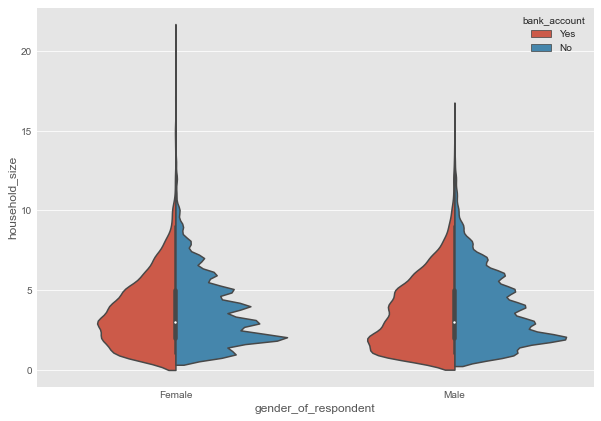

In [106]:
fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='gender_of_respondent', y='household_size',hue='bank_account',split=True,data=train_data)

## Gender Vs Age  

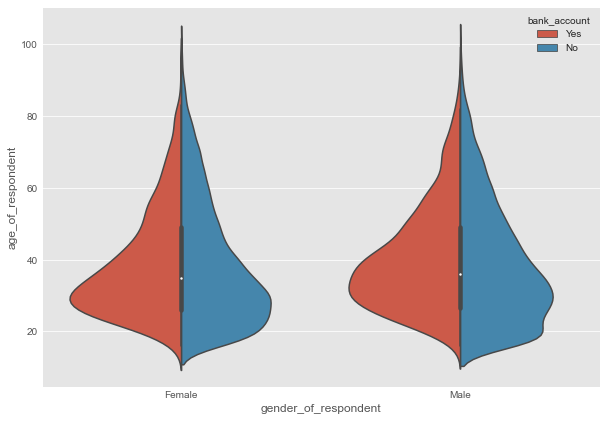

In [107]:
fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='gender_of_respondent', y='age_of_respondent',hue='bank_account',split=True,data=train_data)

**Inference**
* Woah ! Both the genders weren't discriminated in both cases

## Relationship with Age and HouseHold Size Pair plot

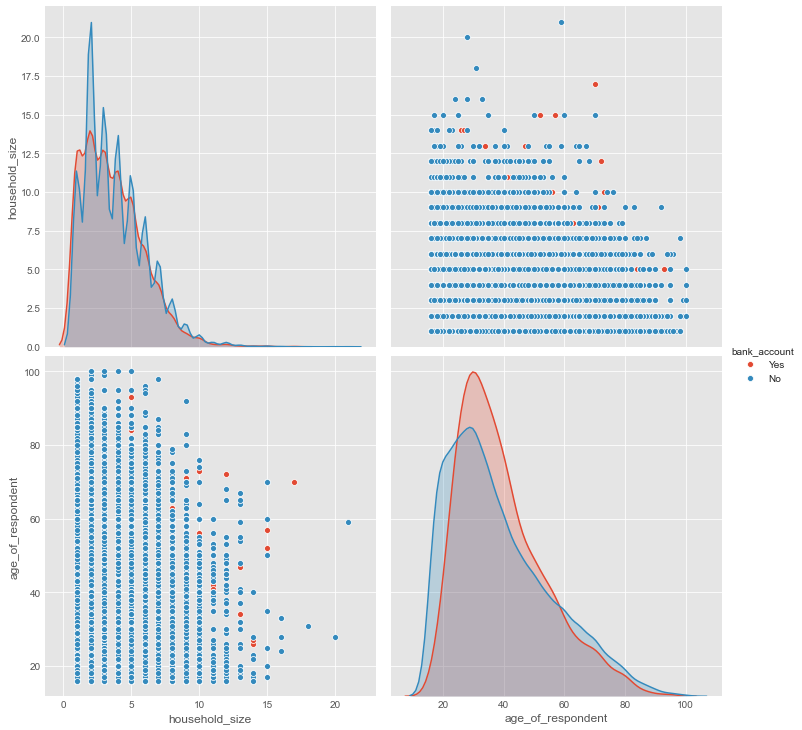

In [108]:
plt.style.use('ggplot')
g = sns.pairplot(train_data, vars=["household_size", "age_of_respondent"],hue="bank_account",size=5)

**Inference**
* The Income band widens for elder employees between 40-60 years of age and the income band restricts to 10000 for 20-30 year old employees
* The employee who were laid off fall under low income(5000-1000) and young age(20-30) category

## Correlation between Factors- Heatmap

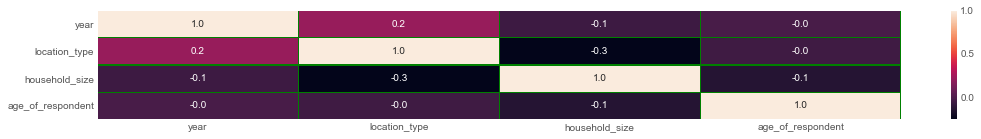

In [109]:
f,ax=plt.subplots(figsize=(18,2))
sns.heatmap(train_data.corr(),annot=True,linewidths=0.2,linecolor="green",fmt=".1f",ax=ax)
plt.show()

**Inference-**
**The band which has lighter colour has high correlation**
* Boxes in second columns,but those are relationship between the location types which obviously correlates 
* Location_type and Household_size has slightly positive correlation which means the type of location affects the number of household size

# Machine learning models

Before jumping onto creating models we have to prepare our dataset for the models. We dont have to perform imputation as we dont have any missing values but we have categorical variables which needs to be encoded.

## Encoding the Categorical Variables

Now lets extract the data into the one which has categorical values into a variable and encode it 

In [110]:
s = (train_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['country', 'uniqueid', 'bank_account', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']


Encoding the categorical data with the help of **LabelEncoder()** function gifted by sci-kit learn package !

In [111]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_data = train_data.copy()
label_data.drop(['uniqueid'],1, inplace=True)    

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(train_data[col])

In [112]:
s = (label_data.dtypes == 'object')
print(list(s[s].index))

[]


Now we don't have any categorical values in our dataset. Let's look at the top records to see it visuall

In [113]:
label_data.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uniqueid
0,0,2018,1,0,1,3,24,0,5,2,3,9,0
1,0,2018,0,0,0,5,70,0,1,4,0,4,1111
2,0,2018,1,1,1,5,26,1,3,3,5,9,2222
3,0,2018,0,0,1,5,34,0,1,2,2,3,3333
4,0,2018,0,1,0,8,26,1,0,3,2,5,4444


Neat, perfect numericals to feed our models. Now, let us split input and output variables

## Setting feature and target variable

In [114]:
data_features=['year', 'location_type','cellphone_access', 'household_size', 'age_of_respondent', 'gender_of_respondent',
               'relationship_with_head', 'marital_status', 'education_level', 'job_type']
X=label_data[data_features]
y=label_data.bank_account

Our goal is to check whether a respondent has a bank account or not. So we assume **bank_account** as our target(y) and rest of the features as predictor variables(X)

## 1. Pipelines and Random Forest Regressor

Creating a pipline and fitting to the Random Forest Regressor model, then we measure Mean Absolute Error to check the deviation from observed and predicted values 

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

my_pipeline = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))])

## Calculating MAE(Mean Absolute Error)
**Mean Absolute Error** is a  model evaluation metric used with  regression models. The mean absolute error of a model with respect to a  test set is the mean of the absolute values of the individual prediction errors on over all  instances in the  test set. Each prediction error is the difference between the true value and the predicted value for the instance.

In [116]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):",scores.mean())

MAE scores:
 [0.27030682 0.19810247 0.16863899 0.120669   0.16010279]
Average MAE score (across experiments): 0.1835640152625811


## 2. Cross Validation and Data Leakage
**Data leakage** refers to a mistake make by the creator of a machine learning model in which they accidentally share information between the test and training data-sets. Typically, when splitting a data-set into testing and training sets, the goal is to ensure that no data is shared between the two

## Calculating Accuracy
We use 5 folds cross validation score and check for the model accuracy

In [117]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Since there is no preprocessing, we don't need a pipeline (used anyway as best practice!)
my_pipeline = make_pipeline(RandomForestClassifier(n_estimators=100))
cv_scores = cross_val_score(my_pipeline, X, y, 
                            cv=5,
                            scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.820993


**82% accuracy**. Not great, Not terrible. Lets look at improving the validation accuracy

In [118]:
# Drop leaky predictors from dataset
potential_leaks = ['year']
X2 = X.drop(potential_leaks, axis=1)

# Evaluate the model with leaky predictors removed
cv_scores = cross_val_score(my_pipeline, X2, y, 
                            cv=5,
                            scoring='accuracy')

print("Cross-val accuracy: %f" % cv_scores.mean())

Cross-val accuracy: 0.847390


**84% accuracy**, The model performed better compared to the earlier. Do you have any suggestions on imporving this model accuracy ? Should I have considered some other features or dropped more? Drop some comments and help me

## sCaling the Data

In [136]:
#Normalizing the iris dataset using Zscore
def z_score(X):
    return ((X - X.mean())/X.std(ddof=0))

X = z_score(X)
X

array([[ 1.20854126, -0.80006449,  0.58972136, ..., -0.39296169,
         0.83389097,  1.15462805],
       [ 1.20854126, -0.80006449, -1.69571609, ...,  1.60812733,
        -1.65519051, -0.46420749],
       [ 1.20854126,  1.24989924,  0.58972136, ...,  0.60758282,
         2.49327861,  1.15462805],
       ...,
       [ 1.20854126, -0.80006449,  0.58972136, ...,  1.60812733,
         0.00419714,  0.50709384],
       [ 1.20854126,  1.24989924,  0.58972136, ..., -2.39405071,
         0.83389097,  1.15462805],
       [ 1.20854126, -0.80006449,  0.58972136, ...,  0.60758282,
         0.83389097,  0.18332673]])

## Splitting into training and test dataset
Now let's split our dataset into training and test/validation data for both feature and label variables

In [137]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [138]:
val_y.head()
train_X

array([[ 1.20854126, -0.80006449, -1.69571609, ..., -0.39296169,
        -1.65519051,  1.15462805],
       [-1.15175136, -0.80006449,  0.58972136, ..., -0.39296169,
        -1.65519051, -0.14044038],
       [ 1.20854126, -0.80006449,  0.58972136, ..., -0.39296169,
         0.00419714, -1.43550882],
       ...,
       [ 1.20854126,  1.24989924,  0.58972136, ..., -0.39296169,
         0.00419714,  0.83086094],
       [-1.15175136, -0.80006449,  0.58972136, ..., -0.39296169,
         0.00419714, -0.14044038],
       [ 1.20854126, -0.80006449,  0.58972136, ..., -0.39296169,
         0.00419714, -1.43550882]])

## Logistic Regression model and accuracry
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes. Mathematically, a logistic regression model predicts P(Y=1) as a function of X.

In [139]:
#Code forked from -https://www.kaggle.com/vanshjatana/applied-machine-learning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 500000)
model.fit(train_X, train_y)
y_pred = model.predict(val_X)
accuracy = model.score(val_X, val_y)
print(accuracy)

0.8726407073626934


**87% accuracy** for our Logistic Regression model. Not bad for the first try !

## Decision Tree Regressor
Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs and utility.Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables. Now we are creating the function directly to get Mean Absolute error to fasten up our coding

In [140]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

## For different leaf nodes
Let's check MAE at each leaf nodes of our decision tree

In [141]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


Absolute 0 error on each leaf nodes!

## Random Forest Regressor
A **Random Forest** is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    return mean_absolute_error(preds, val_y)

In [143]:
print("Mean Absolute error of the Model:")
print(score_dataset(train_X, val_X, train_y, val_y))

Mean Absolute error of the Model:
0.17826832442956286


MAE of **0.17** . Not so great but lets boost our model using XGBoost

##  XGBoost
**XGBoost** is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance

In [144]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(train_X, train_y, 
             early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)], 
             verbose=False)
predictions = my_model.predict(val_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Mean Absolute Error: 0.17977165907768342


## K Nearest Neighbors Classifier

0.8777982606432586


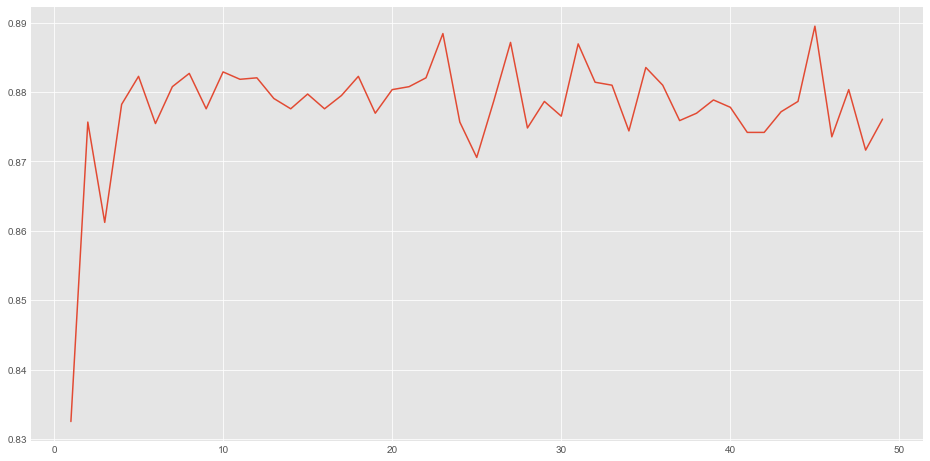

In [145]:
accuracies = []
for k in range(1,50):
    train_X, val_X, train_y, val_y = train_test_split(X, y, test_size= 0.2)
    
    #Defining the Classifier

    clf = neighbors.KNeighborsClassifier(n_jobs=1, n_neighbors=k)
    clf.fit(train_X, train_y)

    accuracy = clf.score(val_X, val_y)
    accuracies.append(accuracy)

print(sum(accuracies)/len(accuracies))
    
plt.plot(range(1,50), accuracies)
plt.show()

In [146]:
clf = neighbors.KNeighborsClassifier(n_jobs=1, n_neighbors=10)
clf.fit(train_X, train_y)
accuracy = clf.score(val_X, val_y)
accuracy

0.8782146652497343

## Native Bayes Classifier